In [1]:
import os
import lmdb
import tkinter as tk
from tkinter import filedialog
import glob
import cv2
from pathlib import Path
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# BASE_DIR = os.getcwd()
# root = tk.Tk()
# root.withdraw()

# FOLDER_PATH = filedialog.askdirectory(title="Select directory containing images")
FOLDER_PATH = "/mnt/d/Datasets/PVDN/images/"

In [7]:
lmdb_path = Path("/".join(str(FOLDER_PATH).split("/")[:-1]) + "/images_lmdb_test")
print(lmdb_path)
lmdb_path.mkdir(parents=True, exist_ok=True)
lmdb_path = lmdb_path.as_posix()

print("Reading LMDB from %s" % lmdb_path)

/mnt/d/Datasets/PVDN/images/images_lmdb_test
Reading LMDB from /mnt/d/Datasets/PVDN/images/images_lmdb_test


In [8]:
class my_dataset_LMDB(Dataset):
    def __init__(self, db_path):
        self.db_path = db_path

        # Delay loading LMDB data until after initialization to avoid "can't pickle Environment Object error"
        self.env = None
        self.txn = None

    def _init_db(self):
        self.env = lmdb.open(self.db_path, subdir=os.path.isdir(self.db_path),
            readonly=True, lock=False,
            readahead=False, meminit=False)
        self.txn = self.env.begin()

    def read_lmdb(self, key):
        lmdb_data = self.txn.get(key.encode("ascii"))
        lmdb_data = np.frombuffer(lmdb_data, dtype=np.uint8)
        lmdb_data = cv2.imdecode(lmdb_data, cv2.IMREAD_COLOR)

        return lmdb_data

    def __getitem__(self, key):
        # Delay loading LMDB data until after initialization
        if self.env is None:
            self._init_db()

        return self.read_lmdb(key)

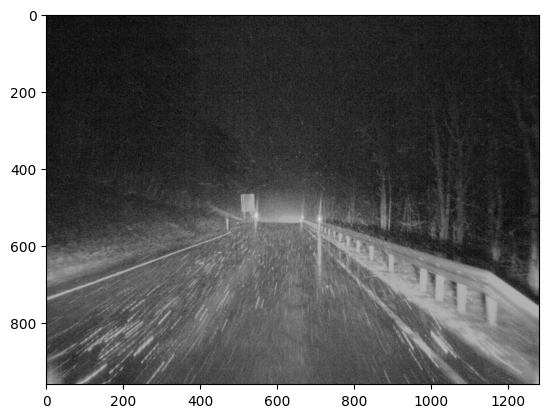

In [9]:
ds = my_dataset_LMDB(lmdb_path)
plt.imshow(ds["S00000_105"])
plt.show()